In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Audio
SR = 44100


# 5-limit tuning vs equal tempered

In [2]:
def sin_generate(freq, duration):
    samples = np.arange(duration * SR) / SR
    y = (np.sin(2 * np.pi * samples * freq)).astype(np.float32)
    return y


In [3]:
intervals = pd.read_html('https://en.wikipedia.org/wiki/Five-limit_tuning')[8]
intervals = intervals.iloc[3:,:-2].set_index(0)
intervals.index.name = 'Name'
intervals.columns = 'Short', 'Semitones', 'Sym1', 'Sym2', 'AsymStd', 'AsymExtra'
intervals



,Short,Semitones,Sym1,Sym2,AsymStd,AsymExtra
Name,,,,,,
Perfect unison,P1,0,1/1,1/1,1/1,1/1
Minor second,m2,1,16/15,16/15,16/15,16/15
Major second,M2,2,9/8,10/9,9/8,9/8
Minor third,m3,3,6/5,6/5,6/5,6/5
Major third,M3,4,5/4,5/4,5/4,5/4
Perfect fourth,P4,5,4/3,4/3,4/3,4/3
Augmented fourth,A4,6,45/32,45/32,45/32,25/18
Diminished fifth,d5,6,64/45,64/45,64/45,36/25
Perfect fifth,P5,7,3/2,3/2,3/2,3/2


In [4]:
BASE_NOTE = 261.63 #C
interval = 'Major third'

fundamental = sin_generate(BASE_NOTE ,1.0)
just_intonation =  sin_generate( BASE_NOTE * eval(intervals.loc[interval, 'AsymStd']) ,1.0)
well_tempered = sin_generate( BASE_NOTE * 2 ** ( eval(intervals.loc[interval, 'Semitones']) / 12 ), 1.0)


Text(0.5, 1.0, 'Equal Tempered')

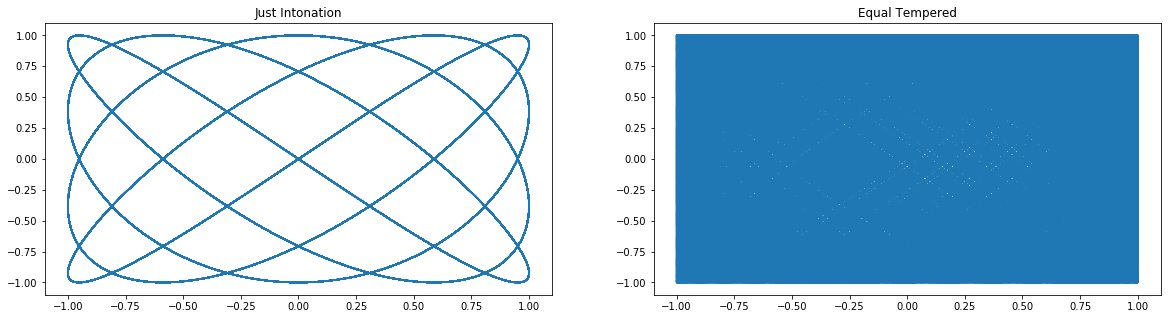

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(fundamental, just_intonation)
plt.title('Just Intonation')

plt.subplot(1, 2, 2)
plt.plot(fundamental, well_tempered)
plt.title('Equal Tempered')



In [6]:
Audio(fundamental, rate = SR) 

In [7]:
 Audio(just_intonation, rate = SR)

In [8]:
Audio(well_tempered, rate = SR)